In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



## Calculating the expected reflectivity of the sphere

In [2]:
# import libraries

from IPython.display import Image, display, Math, Latex
from ipywidgets import widgets, interact, Layout, interactive
from IPython.display import Javascript
import numpy as np
import os
import matplotlib.pyplot as plt
from sphere import GaussSphere
from scatter_calib import calibInterp

display(Javascript('IPython.notebook.execute_cells_below()'))

<IPython.core.display.Javascript object>

The maximumm reflector cross section (RCS) for a sphere with a radius $r$ in the optical region is given by:

In [3]:
display(Math( r'\sigma = \pi r^{2}' ))

<IPython.core.display.Math object>

As such, for a given $r$ the RCS is:

In [4]:
# RCS calculation

def calcRCS(r):
    print( ('RCS: %.9f')%(np.pi*r**2) ) 

r = widgets.FloatSlider(
    value=0.1,
    min=0.0,
    max=1.0,
    step=0.1,
    description='sphere radius $r$:',
    style = {'description_width': 'initial'},
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f')

rcscalc = interact(calcRCS, r=r, readout = False)

interactive(children=(FloatSlider(value=0.1, description='sphere radius $r$:', max=1.0, readout_format='.1f', …

In [5]:
rcscalc.widget.result

The received power in the standard form of the radar range equation for a point target is given by:

In [6]:
display(Math( r'P_{r} = \frac{P_{t}G^{2}\lambda^{2}\sigma}{(4\pi)^{3}r^{4}}' ))

<IPython.core.display.Math object>

The power measured by the radar data system at the output of the radar receiver is the received power at the antenna feed, $Pr$ amplified by the receiver gain $Grec$, so that the power measured by the radar data system can be expressed as;

In [7]:
display(Math( r'P_{rm} = \frac{P_{t}G^{2}G_{rec}\lambda^{2}\sigma}{(4\pi)^{3}r^{4}}' ))

<IPython.core.display.Math object>

The transmitted power, antenna gain and receiver gain can be measured separately and are often given by the manufacturer.
The wavelength and 3 dB beamwidth are also given by the manufacturer and we use the dielectric constant in water:

In [8]:
style = {'description_width': 'initial'}
Pwt = widgets.FloatSlider(value=69, min=0.0, max=100,step=1, description = "Power transmitted $Pt$ in dBm:",style = style )
G = widgets.FloatSlider(value=42.2, min=0.0, max=50,step=1, description = "Antenna gain $G$ in dB:", style = style)
Grec = widgets.FloatSlider(value=32., min=0.0, max=40,step=1, description = "Receiver gain $G_{rec}$ in dB:", style = style)
lamb = widgets.FloatSlider(value=0.032, min=0.0, max=0.05,step=.0001,readout_format='.3f', description = "Wavelength $\lambda$ in m:", style = style)
dbrad = widgets.FloatSlider(value=0.025, min=0.0, max=0.05,step=.0001,readout_format='.3f', description = "$\Theta_{3dB}$ in rad:", style = style)
K2 = widgets.FloatSlider(value=0.94, min=0.0, max=1.,step=.1,readout_format='.2f', description = "$|K|^{2}$:", style = style)
range_m = widgets.FloatSlider(value=1554.3, min=100., max=30000,step=.1,readout_format='.1f', description = "Distance in m:", style = style)
res_m = widgets.FloatSlider(value=75., min=15., max=100,step=5.,readout_format='.1f', description = "Resolution in m:", style = style)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

def calcPower(Pwt:Pwt, G:G, Grec:Grec, lamb:lamb,res_m:res_m, dbrad: dbrad,r:r, K2:K2,range_m:range_m ):
    Ptv = 10**(Pwt/10) # in dBm, so mW!
    Gv = 10**(G/10)
    Grecv = 10**((Grec-3)/10) # Grec = 32 - 3 dB (calibration factor based on Parsivel data)
    rcs = np.pi*r**2
    # calc Prm
    Prm = (Ptv * (Gv**2) * Grecv * (lamb**2) * rcs)/(((4*np.pi)**3) * (range_m**4))
    
    print( ("Measured power: %.9f")%(Prm) )

#Pwt = widgets.FloatSlider(value=69, min=0.0, max=100,step=1,description="Power transmitted $Pt$ in dBm:", style = style)

button = widgets.Button(description="Reset")
button.on_click(run_all)

outsw =  widgets.interactive_output(calcPower,{'Pwt': Pwt, 'G': G, 'Grec': Grec, 'lamb':lamb, 'res_m':res_m, 'dbrad':dbrad, 'r':r, 'K2':K2,'range_m':range_m} )

ui = widgets.VBox([button, Pwt, G, Grec, lamb,res_m, dbrad,r, K2,range_m])
display(ui, outsw)


Output()

The radar reflectivity Z in units of mm<sup>6</sup>/m<sup>3</sup> is given by;

In [9]:
display(Math( '10 \log(Z) = P_{Vm}(dBm) + 20 \log [r(km)] - 10 \log(\Delta r) + C_{z} ' ))

<IPython.core.display.Math object>

And the calibration constant (C<sub>z</sub>) can be calculated as follows:

In [10]:
display(Math( r'C_{z} = \frac{1024 \ln 2 \lambda^{2}}{P_{t}G^{2}G_{rec} c \tau \pi^{3}|K|^{2} \theta_{3dB}^{2}}10^{24} = \frac{512 \ln 2 \lambda^{2}}{P_{t}G^{2}G_{rec}\pi^{3}|K|^{2}\theta_{3dB}^{2}}10^{24} * \frac{1}{\Delta r}' ))

<IPython.core.display.Math object>

Using the values above, multiplying with 10<sup>18</sup> instead of 10<sup>24</sup> (because the units of r and &#916;r are in metres) we obtain:

In [11]:
def calcCalibConst(Pwt, G, Grec, lamb,res_m, dbrad,r, K2,range_m ):
    Ptv = 10**(Pwt/10) # in dBm, so mW!
    Gv = 10**(G/10)
    Grecv = 10**((Grec-3)/10)
    Grec_nc = 10**((Grec)/10)

    Cz = 10*np.log10(512) + 10*np.log10(np.log(2)) + 20*np.log10(lamb) -10*np.log10(Ptv) - 20*np.log10(Gv) -10*np.log10(Grec_nc) - 30*np.log10(np.pi)-10*np.log10(K2) - 20*np.log10(dbrad) + 10*np.log10(10**18)
    Czc = Cz+3
    
    
    print( ("Calibration constant: %.4f \n Calibration constant for + 3dB (previous adjustment): %.4f")%(Cz, Czc) )
    
    
#cc = interactive(calcCalibConst)
#dc = interact(printResult, Czs = cc)

variables = {'Pwt': Pwt, 'G': G, 'Grec': Grec, 'lamb':lamb, 'res_m':res_m, 'dbrad':dbrad, 'r':r, 'K2':K2,'range_m':range_m}
out =  widgets.interactive_output(calcCalibConst,variables )

display( out)

Output()

With the 3 dB adjustment this results in an expected reflectivity value of:

In [12]:
def calcRefl( Pwt, G, Grec, lamb,res_m, dbrad,r, K2,range_m ):
    Ptv = 10**(Pwt/10) # in dBm, so mW!
    Gv = 10**(G/10)
    Grecv = 10**((Grec-3)/10)
    Grec_nc = 10**((Grec)/10)

    Cz = 10*np.log10(512) + 10*np.log10(np.log(2)) + 20*np.log10(lamb) -10*np.log10(Ptv) - 20*np.log10(Gv) -10*np.log10(Grec_nc) - 30*np.log10(np.pi)-10*np.log10(K2) - 20*np.log10(dbrad) + 10*np.log10(10**18)
    Czc = Cz+3
    
    rcs = np.pi*r**2
    # calc Prm
    Prm = (Ptv * (Gv**2) * Grecv * (lamb**2) * rcs)/(((4*np.pi)**3) * (range_m**4))
    
    ZCz = 10*np.log10(Prm) + 20*np.log10(range_m) - 10*np.log10(res_m) + Cz
    ZCzc =  10*np.log10(Prm) + 20*np.log10(range_m) - 10*np.log10(res_m) + Czc
    print( ('%.5f dBZ')%(ZCzc) )
    

variables = {'Pwt': Pwt, 'G': G, 'Grec': Grec, 'lamb':lamb, 'res_m':res_m, 'dbrad':dbrad, 'r':r, 'K2':K2,'range_m':range_m}
outs =  widgets.interactive_output(calcRefl,variables )

display( outs)


Output()

## And now with some actual data ..

A successful sphere calibration was performed in Payerne, Switzerland in August 2016. The experiment was performed with two mobile X-band Doppler dual polarizarion radars (MXPol and DX50).

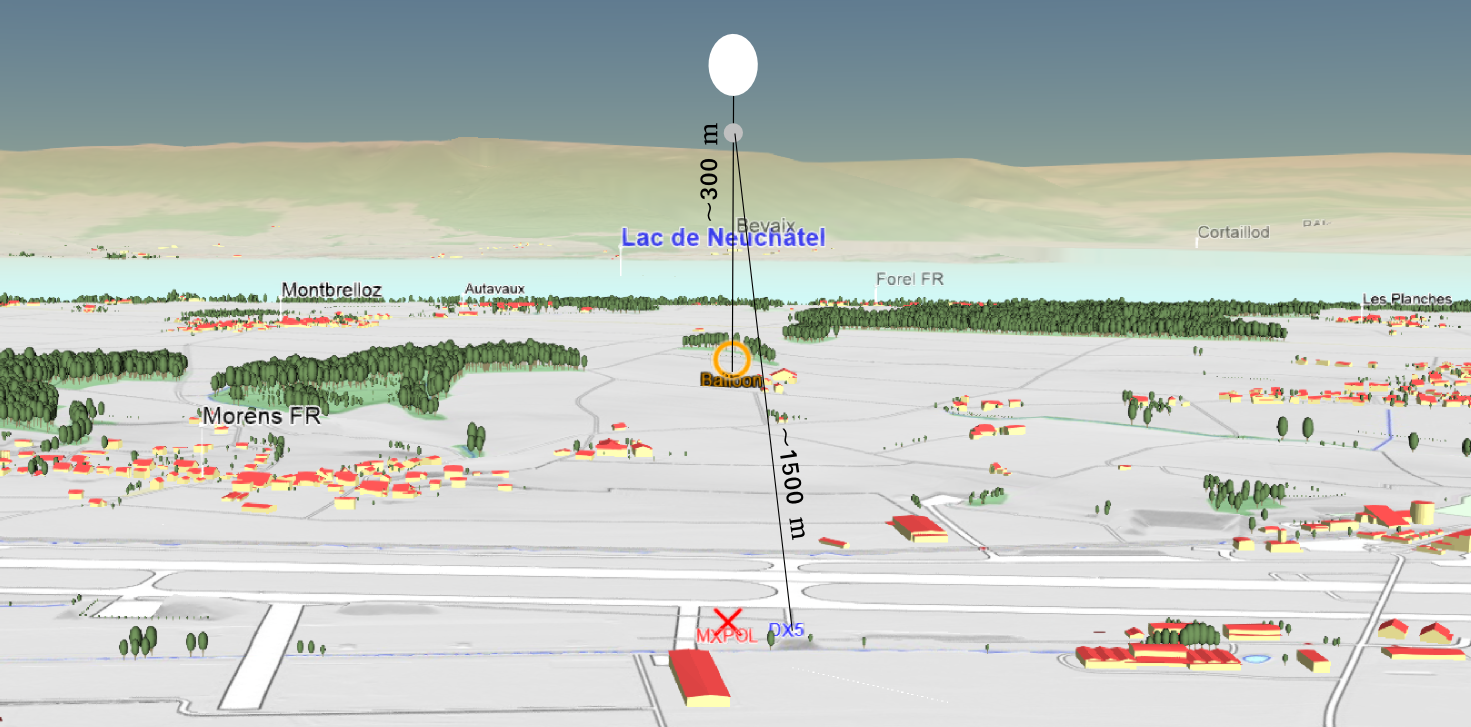

In [13]:
Image(filename ="sphereSetup.png")

The following data is a sample of the data collected by the MXPol radar:

In [15]:
filenames = os.listdir(os.path.join(os.getcwd(), 'Data'))

def createPlot(file, var, plottype):
    filename =os.path.join(os.getcwd(),'Data',file)
   
    gs = GaussSphere(filename,var = 'Zh')
    if plottype == 'GaussFit':
        gs.plot_all(plot='gauss')
    elif plottype == 'Scatter':
        gs.plot_all()
    elif plottype == 'Selection':
        gs.plot_selection(polvar = var)
    elif plottype == 'Interpolated':
        calibInterp(filename, polvar = var, gate = gs.gate)
    elif plottype == 'Histogram':
        ind, select = gs.data_2drad(polvar = var)
        alldata = np.asarray(gs.file_handle.variables[var][gs.gate])
        inv_ind = np.arange(alldata.shape[0])
        inv_ind = np.delete(inv_ind, ind)
        fig, ax = plt.subplots()
        alldata = alldata[inv_ind]
        alldata = alldata[~np.isnan(alldata)]
        select = np.asarray(select)
        select = select[~np.isnan(select)]
        plt.hist(alldata, normed = True, label = 'outside Sphere', color = 'blue')
        plt.hist(select, normed = True, alpha = 0.5, label = 'inside Sphere', color = 'red')
        plt.legend()
        

fileselect = widgets.Dropdown(
    options=filenames,
    value=filenames[0],
    description='Select file:',
    style = style,
    disabled=False,
)

varselect = widgets.RadioButtons(
    options=['Zh', 'Zv', 'Zdr', 'Sw', 'Rvel'],
    value='Zh',
    description='Polarimetric variable:',
    style = style,
    disabled=False
)

plottype = widgets.ToggleButtons(
    options=['GaussFit','Scatter','Interpolated', 'Selection', 'Histogram'],
    description='Plot type:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    style = style,
    tooltips=['Gaussian fitted plot (Zh only)','Scatter plot data (Zh only)','Interpolated data', 'Selected data', 'Histogram of selection'],
#     icons=['check'] * 3
)

uiSfiles = widgets.VBox([fileselect, varselect, plottype])


outplot =  widgets.interactive_output(createPlot,{'file':fileselect, 'var':varselect, 'plottype':plottype} )

display(uiSfiles, outplot)

Output()